In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\r_nem\OneDrive\Desktop\airlines_delay.csv')
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [3]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [4]:
df.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1
539381,6377.0,770.0,55.0,OO,CPR,DEN,2,1


In [5]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [6]:
df.set_index('Flight',inplace=True)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0


In [7]:
df.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [8]:
df.shape

(539382, 7)

In [9]:
df.isnull().sum()

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

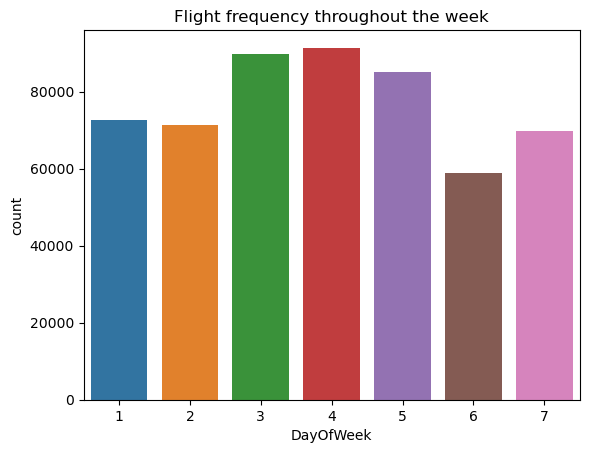

In [11]:
Order = list(range(1,8))
sns.countplot(x='DayOfWeek',data=df,order=Order).set(title='Flight frequency throughout the week');

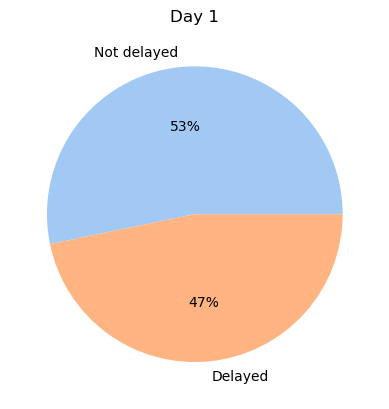

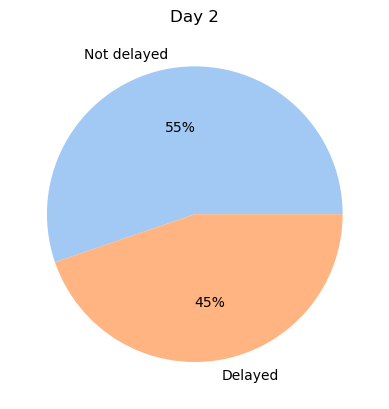

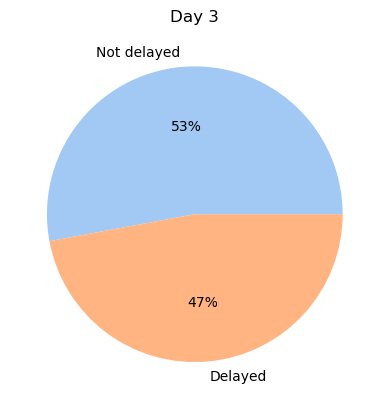

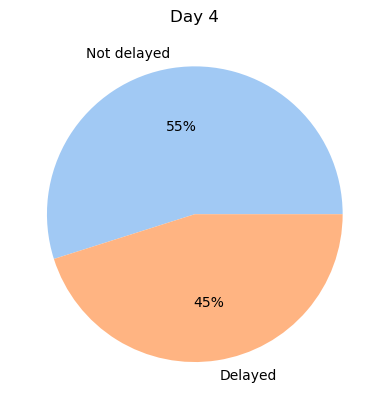

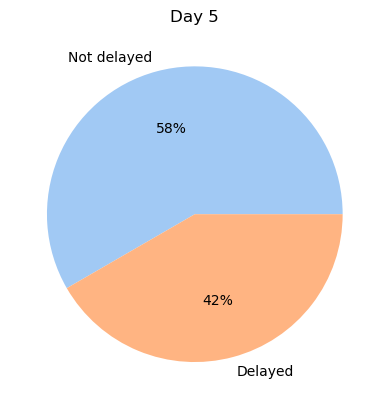

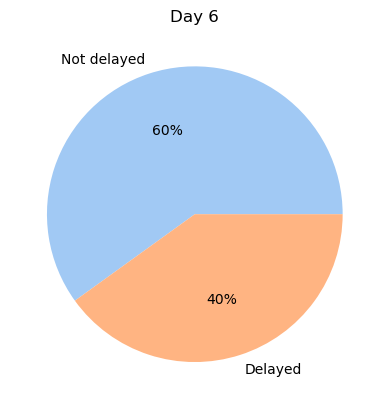

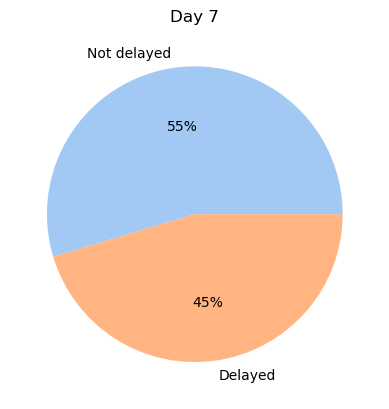

In [12]:
a = df.groupby(['DayOfWeek','Class']).count().unstack('Class')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights


pieChartLabels = ['Not delayed','Delayed']

Colors = sns.color_palette('pastel')[0:5]
  
for i in range(1,8):
    b = a.iloc[i-1,:]
    
    plt.pie(b, labels = pieChartLabels, colors = Colors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

C:\Users\r_nem\AppData\Local\Temp\ipykernel_28904\2702247729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pl = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)


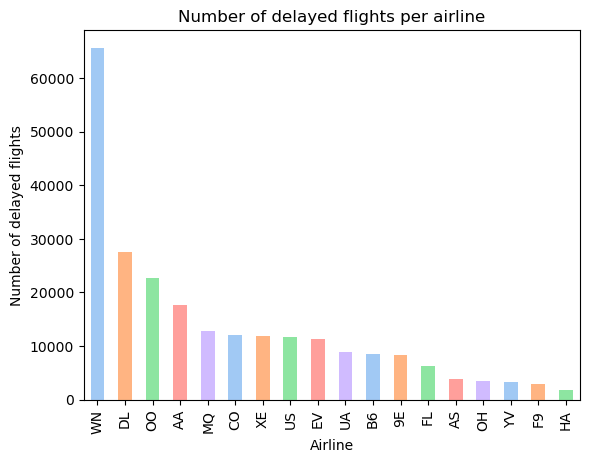

In [13]:
pl = df.groupby('Airline').sum()['Class'].sort_values(ascending=False)
pl.plot(kind='bar',color=Colors)
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights per airline')
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[['Time','Length']] = mms.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,0.899930,0.215267,DL,ATL,HOU,1,0
6948.0,0.244927,0.222901,OO,COS,ORD,4,0
1247.0,0.811756,0.218321,B6,BOS,CLT,3,0
31.0,0.979706,0.525191,US,OGG,PHX,6,0
563.0,0.477257,0.149618,FL,BMI,ATL,4,0


In [15]:
categorical_features = ['Airline','AirportFrom','AirportTo','DayOfWeek']
df = pd.get_dummies(data=df,columns=categorical_features,drop_first=True)
df.head()

,Time,Length,Class,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,...,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1247.0,0.811756,0.218321,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
transportedColumn = df.pop('Class')
df = pd.concat([df,transportedColumn],axis=1)
df.head()

,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,...,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Class
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1247.0,0.811756,0.218321,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [17]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);

In [20]:
# Predicting the Test set results
#print("The model's accuracy on the training set is: " + str(knn.score(X_train,y_train)*100)+ "%")
#print("The model's accuracy on the test set is: " + str(knn.score(X_test,y_test)*100)+ "%")

#I have commented out this code as it takes too long to run considering we will not use this model.

#The training set accuracy was 72% and the test set accuracy was 62%

We can see that the KNN model overfitted quite substantially, and the accuracy is not that good. The model was also very computationally expensive, so we will not bother with tuning it, and we will move onto the next model.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train);

In [22]:
print("The model's accuracy on the training set is: " + str(rf.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(rf.score(X_test,y_test)*100)+ "%")

The model's accuracy on the training set is: 82.49635164090083%
The model's accuracy on the test set is: 60.876309365633595%


This model was far less computationally expensive, and while the training set accuracy improved, the model overfitted even more than the KNN model.

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
ann = keras.models.Sequential()
ann.add(Dense(units=305, activation='relu', input_shape=X_train[0].shape)) 
ann.add(Dense(units=153, activation='relu')) 
ann.add(Dense(units=1, activation='sigmoid'));

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
11799/11799 [==============================] - 30s 3ms/step - loss: 0.6229 - accuracy: 0.6520
Epoch 2/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.6105 - accuracy: 0.6649
Epoch 3/100
11799/11799 [==============================] - 33s 3ms/step - loss: 0.6036 - accuracy: 0.6727
Epoch 4/100
11799/11799 [==============================] - 33s 3ms/step - loss: 0.5980 - accuracy: 0.6773
Epoch 5/100
11799/11799 [==============================] - 33s 3ms/step - loss: 0.5930 - accuracy: 0.6807
Epoch 6/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5885 - accuracy: 0.6848
Epoch 7/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5845 - accuracy: 0.6880
Epoch 8/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5803 - accuracy: 0.6900
Epoch 9/100
11799/11799 [==============================] - 33s 3ms/step - loss: 0.5769 - accuracy: 0.6932
Epoch 10/100
11799/11799 [====================

11799/11799 [==============================] - 32s 3ms/step - loss: 0.5117 - accuracy: 0.7342
Epoch 78/100
11799/11799 [==============================] - 30s 3ms/step - loss: 0.5114 - accuracy: 0.7338
Epoch 79/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5113 - accuracy: 0.7340
Epoch 80/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5109 - accuracy: 0.7329
Epoch 81/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5106 - accuracy: 0.7343
Epoch 82/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5104 - accuracy: 0.7337
Epoch 83/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5099 - accuracy: 0.7353
Epoch 84/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5096 - accuracy: 0.7347
Epoch 85/100
11799/11799 [==============================] - 32s 3ms/step - loss: 0.5094 - accuracy: 0.7347
Epoch 86/100
11799/11799 [========================

In [28]:
nn = keras.models.Sequential()
ann.add(Dense(units=305, activation='LeakyReLU', input_shape=X_train[0].shape))
ann.add(Dropout(0.1))
ann.add(Dense(units=153, activation='LeakyReLU'))
ann.add(Dropout(0.1))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
11799/11799 [==============================] - 47s 4ms/step - loss: 0.5097 - accuracy: 0.7357
Epoch 2/20
11799/11799 [==============================] - 49s 4ms/step - loss: 0.5079 - accuracy: 0.7358
Epoch 3/20
11799/11799 [==============================] - 49s 4ms/step - loss: 0.5075 - accuracy: 0.7352
Epoch 4/20
11799/11799 [==============================] - 49s 4ms/step - loss: 0.5073 - accuracy: 0.7362
Epoch 5/20
11799/11799 [==============================] - 48s 4ms/step - loss: 0.5069 - accuracy: 0.7360
Epoch 6/20
11799/11799 [==============================] - 47s 4ms/step - loss: 0.5066 - accuracy: 0.7361
Epoch 7/20
11799/11799 [==============================] - 48s 4ms/step - loss: 0.5066 - accuracy: 0.7359
Epoch 8/20
11799/11799 [==============================] - 47s 4ms/step - loss: 0.5062 - accuracy: 0.7361
Epoch 9/20
11799/11799 [==============================] - 47s 4ms/step - loss: 0.5060 - accuracy: 0.7366
Epoch 10/20
11799/11799 [==============================

In [29]:
annTrainingAcc = hist.history['accuracy'][0]*100

In [30]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

5057/5057 [==============================] - 11s 2ms/step


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
annTestAcc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) * 100
print("The ANN has a training accuracy of " + str(annTrainingAcc) + "%, and a test accuracy of " + str(annTestAcc) + "%")

The ANN has a training accuracy of 73.57422709465027%, and a test accuracy of 62.97871025553873%


We have a model that does not overfit or underfit - this looks good. However, despite tuning the model, its accuracy remains low. Thanks!